In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from scipy import stats
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [2]:
# Let’s change the default plot size so we have a better view of our line plots:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

In [3]:
# load a dataset (as a dataframe)
dataset = sns.load_dataset("tips")
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='size', ylabel='total_bill'>

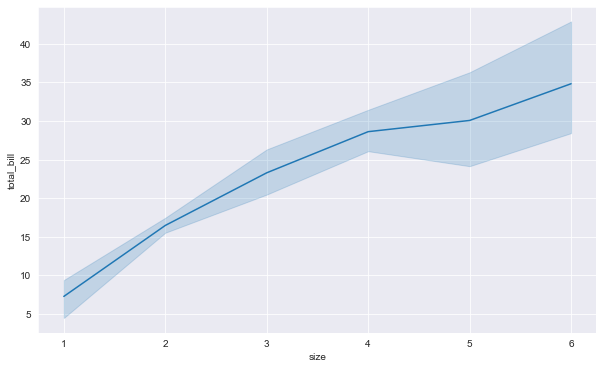

In [4]:
sns.lineplot(x='size',y='total_bill', data=dataset)

In [19]:
# get all names from the folder
# https://stackoverflow.com/a/29206464/7060068
import os

path = '/Users/fan/OneDrive - University of Southampton/My-Projects/Edge-Cloud-Resource-Allocation/marl-edge-cloud/results/edge_cloud_independent_ppo_with_history_5_actions'
dir_list = os.listdir(path)
print(dir_list)

['PPO_EdgeCloudEnv1_15403_00001_1_lr=0.001,train_batch_size=3000_2021-10-27_06-45-25', 'PPO_EdgeCloudEnv1_7becd_00000_0_lr=0.0001,train_batch_size=3000_2021-10-27_07-59-52', 'PPO_EdgeCloudEnv1_153e6_00000_0_lr=0.0001,train_batch_size=3000_2021-10-27_06-45-25', 'PPO_EdgeCloudEnv1_7bdca_00000_0_lr=0.0001,train_batch_size=3000_2021-10-27_07-59-52', '.DS_Store', 'PPO_EdgeCloudEnv1_7bdca_00001_1_lr=0.001,train_batch_size=3000_2021-10-27_07-59-52', 'PPO_EdgeCloudEnv1_153ee_00000_0_lr=0.0001,train_batch_size=3000_2021-10-27_06-45-25', 'PPO_EdgeCloudEnv1_7bed6_00000_0_lr=0.0001,train_batch_size=3000_2021-10-27_07-59-52', 'PPO_EdgeCloudEnv1_7bed6_00001_1_lr=0.001,train_batch_size=3000_2021-10-27_07-59-52', 'PPO_EdgeCloudEnv1_7beaf_00000_0_lr=0.0001,train_batch_size=3000_2021-10-27_07-59-52', 'PPO_EdgeCloudEnv1_7beaf_00001_1_lr=0.001,train_batch_size=3000_2021-10-27_07-59-52', 'PPO_EdgeCloudEnv1_153ee_00001_1_lr=0.001,train_batch_size=3000_2021-10-27_06-45-25', 'PPO_EdgeCloudEnv1_153e6_00001_1_l

In [100]:
# read results in .json files
import json
folder = dir_list[1]
file_path = f'{path}/{folder}/result.json'
print(file_path)
print(f"file size = {os.stat(file_path).st_size}")

results = []
# load data using Python JSON module
with open(file_path) as f:
    # json.loads (and json.load) does not decode multiple json object. So load each line at a time.
    # https://stackoverflow.com/a/29312618/7060068
    for line in f:
        data = json.loads(line)
        print(data)
        results.append(data)






/Users/fan/OneDrive - University of Southampton/My-Projects/Edge-Cloud-Resource-Allocation/marl-edge-cloud/results/edge_cloud_independent_ppo_with_history_5_actions/PPO_EdgeCloudEnv1_7becd_00000_0_lr=0.0001,train_batch_size=3000_2021-10-27_07-59-52/result.json
file size = 514027
{'episode_reward_max': 28307.593552384635, 'episode_reward_min': 18599.945598889604, 'episode_reward_mean': 24364.408706453163, 'episode_len_mean': 30.0, 'episode_media': {}, 'episodes_this_iter': 104, 'policy_reward_min': {'default': 6199.981866296531}, 'policy_reward_max': {'default': 9435.864517461538}, 'policy_reward_mean': {'default': 8121.469568817721}, 'custom_metrics': {'Social Welfare_mean': 8121.469568817722, 'Social Welfare_min': 6199.981866296531, 'Social Welfare_max': 9435.864517461538, 'Social Welfare (Online Myopic)_mean': 9053.380503164699, 'Social Welfare (Online Myopic)_min': 8273.234344148392, 'Social Welfare (Online Myopic)_max': 9771.982609491955, 'Social Welfare (Random Allocation)_mean': 

### Convert results to a dataframe
- only keep the columns needed?

In [101]:


# Flatten data
df_nested_list = pd.json_normalize(results, record_path =['custom_metrics'])
df_nested_list.head()

# df = pd.read_json(file_path)
# df.head()

TypeError: {'episode_reward_max': 28307.593552384635, 'episode_reward_min': 18599.945598889604, 'episode_reward_mean': 24364.408706453163, 'episode_len_mean': 30.0, 'episode_media': {}, 'episodes_this_iter': 104, 'policy_reward_min': {'default': 6199.981866296531}, 'policy_reward_max': {'default': 9435.864517461538}, 'policy_reward_mean': {'default': 8121.469568817721}, 'custom_metrics': {'Social Welfare_mean': 8121.469568817722, 'Social Welfare_min': 6199.981866296531, 'Social Welfare_max': 9435.864517461538, 'Social Welfare (Online Myopic)_mean': 9053.380503164699, 'Social Welfare (Online Myopic)_min': 8273.234344148392, 'Social Welfare (Online Myopic)_max': 9771.982609491955, 'Social Welfare (Random Allocation)_mean': 5743.4119146736475, 'Social Welfare (Random Allocation)_min': 4213.016864759353, 'Social Welfare (Random Allocation)_max': 7052.153438347982, 'Allocated Tasks Number_mean': 29.26923076923077, 'Allocated Tasks Number_min': 26, 'Allocated Tasks Number_max': 30, 'Bad Allocations Number_mean': 6.461538461538462, 'Bad Allocations Number_min': 1, 'Bad Allocations Number_max': 17}, 'hist_stats': {'episode_reward': [24160.73428102211, 23543.813304125993, 25178.93710157224, 27108.136489463017, 27596.51349161268, 22790.775536405643, 24495.511614145194, 24904.266368208708, 22644.800667333293, 26250.15732075609, 24517.986215853343, 23006.20595711364, 26505.250278801028, 27110.989798041603, 25925.870137670343, 22172.79909540605, 25585.351304308573, 24480.097953200097, 22239.780105145033, 26716.18995097229, 25590.29766450804, 23123.143188549653, 23935.41525524867, 25416.25228937705, 26906.429406373947, 23871.12696675539, 24730.265297795337, 23213.462784090367, 28307.593552384635, 22947.97567783329, 23472.03035897621, 22253.921142236413, 23746.51429692923, 22100.685812411888, 24335.269101714242, 25123.425137024038, 23768.144405208503, 23945.9084239327, 24738.889289587798, 25297.67969921101, 25999.138989585772, 21518.323626925725, 25103.03187645992, 26352.004927704224, 24001.12907429421, 25161.96433953064, 22153.697698982018, 23416.015095416897, 24186.934327740604, 23793.957175067077, 25819.059160456225, 21385.667535294193, 25279.56554610607, 22255.102995476867, 27929.556354778997, 25052.27324532754, 23871.247536618554, 24003.245853412685, 26565.671976697573, 24352.970045853694, 22953.8972006224, 21400.764718000577, 25204.341915012184, 18599.945598889604, 27080.44522291653, 23100.55311020273, 25430.012638890603, 23827.086693537018, 25627.514774278232, 25174.5927663904, 26684.05728001419, 21749.370808332736, 23946.200591109213, 23961.452861538277, 23223.579822900854, 23517.505236348847, 24375.77802812585, 22846.77148818774, 25441.78360809691, 26788.15291746867, 21335.321133209305, 21758.548971614386, 22577.800253902373, 23854.717491588868, 26142.4395966528, 22785.709931572375, 27407.87575642601, 23540.993233619673, 25698.590615271798, 23757.020315052778, 23952.57167703299, 24141.4747862945, 23395.497676713465, 26748.574464583762, 25186.214625466873, 24841.427165020228, 23537.192746769666, 23695.500794325082, 25204.822676529428, 23919.2274384496, 24379.81415227124, 23613.669686856112, 24859.188174117287, 24671.350723890133], 'episode_lengths': [30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30], 'policy_default_reward': [8053.578093674036, 8053.578093674036, 8053.578093674036, 7847.9377680419975, 7847.9377680419975, 7847.9377680419975, 8392.979033857411, 8392.979033857411, 8392.979033857411, 9036.045496487675, 9036.045496487675, 9036.045496487675, 9198.837830537555, 9198.837830537555, 9198.837830537555, 7596.925178801886, 7596.925178801886, 7596.925178801886, 8165.1705380483945, 8165.1705380483945, 8165.1705380483945, 8301.42212273623, 8301.42212273623, 8301.42212273623, 7548.266889111093, 7548.266889111093, 7548.266889111093, 8750.052440252028, 8750.052440252028, 8750.052440252028, 8172.662071951109, 8172.662071951109, 8172.662071951109, 7668.735319037883, 7668.735319037883, 7668.735319037883, 8835.083426267009, 8835.083426267009, 8835.083426267009, 9036.9965993472, 9036.9965993472, 9036.9965993472, 8641.956712556772, 8641.956712556772, 8641.956712556772, 7390.933031802019, 7390.933031802019, 7390.933031802019, 8528.450434769517, 8528.450434769517, 8528.450434769517, 8160.0326510667, 8160.0326510667, 8160.0326510667, 7413.260035048341, 7413.260035048341, 7413.260035048341, 8905.396650324094, 8905.396650324094, 8905.396650324094, 8530.099221502682, 8530.099221502682, 8530.099221502682, 7707.714396183216, 7707.714396183216, 7707.714396183216, 7978.471751749559, 7978.471751749559, 7978.471751749559, 8472.08409645902, 8472.08409645902, 8472.08409645902, 8968.809802124648, 8968.809802124648, 8968.809802124648, 7957.042322251796, 7957.042322251796, 7957.042322251796, 8243.42176593178, 8243.42176593178, 8243.42176593178, 7737.820928030126, 7737.820928030126, 7737.820928030126, 9435.864517461538, 9435.864517461538, 9435.864517461538, 7649.325225944425, 7649.325225944425, 7649.325225944425, 7824.010119658733, 7824.010119658733, 7824.010119658733, 7417.973714078806, 7417.973714078806, 7417.973714078806, 7915.504765643075, 7915.504765643075, 7915.504765643075, 7366.895270803965, 7366.895270803965, 7366.895270803965, 8111.756367238077, 8111.756367238077, 8111.756367238077, 8374.47504567469, 8374.47504567469, 8374.47504567469, 7922.714801736168, 7922.714801736168, 7922.714801736168, 7981.969474644236, 7981.969474644236, 7981.969474644236, 8246.296429862598, 8246.296429862598, 8246.296429862598, 8432.559899737003, 8432.559899737003, 8432.559899737003, 8666.379663195261, 8666.379663195261, 8666.379663195261, 7172.774542308579, 7172.774542308579, 7172.774542308579, 8367.677292153305, 8367.677292153305, 8367.677292153305, 8784.001642568073, 8784.001642568073, 8784.001642568073, 8000.376358098068, 8000.376358098068, 8000.376358098068, 8387.321446510216, 8387.321446510216, 8387.321446510216, 7384.565899660675, 7384.565899660675, 7384.565899660675, 7805.338365138963, 7805.338365138963, 7805.338365138963, 8062.311442580197, 8062.311442580197, 8062.311442580197, 7931.3190583556925, 7931.3190583556925, 7931.3190583556925, 8606.353053485407, 8606.353053485407, 8606.353053485407, 7128.555845098068, 7128.555845098068, 7128.555845098068, 8426.521848702017, 8426.521848702017, 8426.521848702017, 7418.367665158958, 7418.367665158958, 7418.367665158958, 9309.852118259665, 9309.852118259665, 9309.852118259665, 8350.757748442511, 8350.757748442511, 8350.757748442511, 7957.082512206182, 7957.082512206182, 7957.082512206182, 8001.081951137566, 8001.081951137566, 8001.081951137566, 8855.223992232523, 8855.223992232523, 8855.223992232523, 8117.656681951237, 8117.656681951237, 8117.656681951237, 7651.299066874129, 7651.299066874129, 7651.299066874129, 7133.588239333526, 7133.588239333526, 7133.588239333526, 8401.447305004061, 8401.447305004061, 8401.447305004061, 6199.981866296531, 6199.981866296531, 6199.981866296531, 9026.81507430551, 9026.81507430551, 9026.81507430551, 7700.184370067579, 7700.184370067579, 7700.184370067579, 8476.6708796302, 8476.6708796302, 8476.6708796302, 7942.362231179008, 7942.362231179008, 7942.362231179008, 8542.504924759407, 8542.504924759407, 8542.504924759407, 8391.530922130136, 8391.530922130136, 8391.530922130136, 8894.685760004726, 8894.685760004726, 8894.685760004726, 7249.790269444251, 7249.790269444251, 7249.790269444251, 7982.066863703065, 7982.066863703065, 7982.066863703065, 7987.150953846091, 7987.150953846091, 7987.150953846091, 7741.193274300278, 7741.193274300278, 7741.193274300278, 7839.168412116282, 7839.168412116282, 7839.168412116282, 8125.259342708611, 8125.259342708611, 8125.259342708611, 7615.590496062585, 7615.590496062585, 7615.590496062585, 8480.594536032304, 8480.594536032304, 8480.594536032304, 8929.384305822885, 8929.384305822885, 8929.384305822885, 7111.773711069766, 7111.773711069766, 7111.773711069766, 7252.849657204797, 7252.849657204797, 7252.849657204797, 7525.933417967461, 7525.933417967461, 7525.933417967461, 7951.572497196294, 7951.572497196294, 7951.572497196294, 8714.1465322176, 8714.1465322176, 8714.1465322176, 7595.23664385746, 7595.23664385746, 7595.23664385746, 9135.95858547534, 9135.95858547534, 9135.95858547534, 7846.997744539893, 7846.997744539893, 7846.997744539893, 8566.196871757262, 8566.196871757262, 8566.196871757262, 7919.006771684256, 7919.006771684256, 7919.006771684256, 7984.190559010998, 7984.190559010998, 7984.190559010998, 8047.1582620981635, 8047.1582620981635, 8047.1582620981635, 7798.499225571151, 7798.499225571151, 7798.499225571151, 8916.19148819459, 8916.19148819459, 8916.19148819459, 8395.404875155626, 8395.404875155626, 8395.404875155626, 8280.475721673416, 8280.475721673416, 8280.475721673416, 7845.730915589885, 7845.730915589885, 7845.730915589885, 7898.500264775025, 7898.500264775025, 7898.500264775025, 8401.607558843145, 8401.607558843145, 8401.607558843145, 7973.075812816535, 7973.075812816535, 7973.075812816535, 8126.60471742374, 8126.60471742374, 8126.60471742374, 7871.223228952033, 7871.223228952033, 7871.223228952033, 8286.3960580391, 8286.3960580391, 8286.3960580391, 8223.78357463004, 8223.78357463004, 8223.78357463004]}, 'sampler_perf': {'mean_raw_obs_processing_ms': 13.138700781575864, 'mean_inference_ms': 2.041262967507248, 'mean_action_processing_ms': 0.10365827004318041, 'mean_env_wait_ms': 1350.510047296124, 'mean_env_render_ms': 0.0}, 'off_policy_estimator': {}, 'num_healthy_workers': 8, 'timesteps_total': 3120, 'agent_timesteps_total': 9360, 'timers': {'sample_time_ms': 534663.621, 'sample_throughput': 5.835, 'learn_time_ms': 20034.997, 'learn_throughput': 155.728, 'update_time_ms': 3.857}, 'info': {'learner': {'default': {'learner_stats': {'allreduce_latency': 0.0, 'cur_kl_coeff': 0.19999999999999996, 'cur_lr': 0.00010000000000000003, 'total_loss': 17603879.22702703, 'policy_loss': 0.0005166244157170458, 'vf_loss': 17603878.928828828, 'vf_explained_var': 0.0029168135952204466, 'kl': 0.00910413948831882, 'entropy': 1.6014392649805225, 'entropy_coeff': 0.0}, 'model': {}, 'custom_metrics': {}}}, 'num_steps_sampled': 3120, 'num_agent_steps_sampled': 9360, 'num_steps_trained': 3120, 'num_agent_steps_trained': 9360}, 'done': False, 'episodes_total': 104, 'training_iteration': 1, 'experiment_id': 'b6b8e66e59444d81a760781c657955eb', 'date': '2021-10-27_08-09-18', 'timestamp': 1635318558, 'time_this_iter_s': 554.7167642116547, 'time_total_s': 554.7167642116547, 'pid': 116100, 'hostname': 'red003.cluster.local', 'node_ip': '10.13.32.3', 'config': {'num_workers': 8, 'num_envs_per_worker': 1, 'create_env_on_driver': False, 'rollout_fragment_length': 375, 'batch_mode': 'complete_episodes', 'gamma': 0.99, 'lr': 0.0001, 'train_batch_size': 3000, 'model': {'_use_default_native_models': False, 'fcnet_hiddens': [256, 256], 'fcnet_activation': 'tanh', 'conv_filters': None, 'conv_activation': 'relu', 'post_fcnet_hiddens': [], 'post_fcnet_activation': 'relu', 'free_log_std': False, 'no_final_linear': False, 'vf_share_layers': False, 'use_lstm': False, 'max_seq_len': 20, 'lstm_cell_size': 256, 'lstm_use_prev_action': False, 'lstm_use_prev_reward': False, '_time_major': False, 'use_attention': False, 'attention_num_transformer_units': 1, 'attention_dim': 64, 'attention_num_heads': 1, 'attention_head_dim': 32, 'attention_memory_inference': 50, 'attention_memory_training': 50, 'attention_position_wise_mlp_dim': 32, 'attention_init_gru_gate_bias': 2.0, 'attention_use_n_prev_actions': 0, 'attention_use_n_prev_rewards': 0, 'num_framestacks': 'auto', 'dim': 84, 'grayscale': False, 'zero_mean': True, 'custom_model': 'FCModel', 'custom_model_config': {'layers': [256, 256, 256, 256]}, 'custom_action_dist': None, 'custom_preprocessor': None, 'lstm_use_prev_action_reward': -1, 'framestack': True}, 'optimizer': {}, 'horizon': None, 'soft_horizon': False, 'no_done_at_end': False, 'env': 'EdgeCloudEnv1', 'observation_space': None, 'action_space': None, 'env_config': {'n_nodes': 3, 'num_agents': 3, 'n_tasks_in_total': 40, 'n_tasks_to_allocate': 30, 'duration': 20, 'usage_time_ub': 6, 'seed': 694, 'avg_resource_capacity': {'0': [50, 50, 50], '1': [5, 5, 5], '2': [5, 5, 5]}, 'avg_unit_cost': {'0': [4, 4, 4], '1': [0, 0, 0], '2': [0, 0, 0]}, 'verbose': False, 'record_history': True, 'history_len': 3, 'cooperative': True, 'n_actions': 5, 'auction_type': 'first-price'}, 'env_task_fn': None, 'render_env': False, 'record_env': False, 'clip_rewards': None, 'normalize_actions': True, 'clip_actions': False, 'preprocessor_pref': 'deepmind', 'log_level': 'WARN', 'callbacks': "<class 'learning.training.CustomCallbacks'>", 'ignore_worker_failures': False, 'log_sys_usage': True, 'fake_sampler': False, 'framework': 'torch', 'eager_tracing': False, 'explore': True, 'exploration_config': {'type': 'StochasticSampling'}, 'evaluation_interval': None, 'evaluation_num_episodes': 10, 'evaluation_parallel_to_training': False, 'in_evaluation': False, 'evaluation_config': {}, 'evaluation_num_workers': 0, 'custom_eval_function': None, 'sample_async': False, 'sample_collector': "<class 'ray.rllib.evaluation.collectors.simple_list_collector.SimpleListCollector'>", 'observation_filter': 'MeanStdFilter', 'synchronize_filters': True, 'tf_session_args': {'intra_op_parallelism_threads': 2, 'inter_op_parallelism_threads': 2, 'gpu_options': {'allow_growth': True}, 'log_device_placement': False, 'device_count': {'CPU': 1}, 'allow_soft_placement': True}, 'local_tf_session_args': {'intra_op_parallelism_threads': 8, 'inter_op_parallelism_threads': 8}, 'compress_observations': False, 'collect_metrics_timeout': 180, 'metrics_smoothing_episodes': 100, 'remote_worker_envs': False, 'remote_env_batch_wait_ms': 0, 'min_iter_time_s': 0, 'timesteps_per_iteration': 0, 'seed': 932, 'extra_python_environs_for_driver': {}, 'extra_python_environs_for_worker': {}, 'num_gpus': 0, '_fake_gpus': False, 'num_cpus_per_worker': 1, 'num_gpus_per_worker': 0, 'custom_resources_per_worker': {}, 'num_cpus_for_driver': 1, 'placement_strategy': 'PACK', 'input': 'sampler', 'actions_in_input_normalized': False, 'input_evaluation': ['is', 'wis'], 'postprocess_inputs': False, 'shuffle_buffer_size': 0, 'output': None, 'output_compress_columns': ['obs', 'new_obs'], 'output_max_file_size': 67108864, 'multiagent': {'policies': {'default': ["<class 'ray.rllib.policy.policy_template.PPOTorchPolicy'>", 'Box(0.0, 10000.0, (34,), float16)', 'Discrete(5)', {}]}, 'policy_mapping_fn': '<function get_trainer_config.<locals>.<lambda> at 0x2b92df38f0d0>', 'policies_to_train': None, 'observation_fn': None, 'replay_mode': 'independent', 'count_steps_by': 'env_steps'}, 'logger_config': None, 'simple_optimizer': True, 'monitor': -1, 'use_critic': True, 'use_gae': True, 'lambda': 1.0, 'kl_coeff': 0.2, 'sgd_minibatch_size': 128, 'shuffle_sequences': True, 'num_sgd_iter': 30, 'lr_schedule': None, 'vf_loss_coeff': 1.0, 'entropy_coeff': 0.0, 'entropy_coeff_schedule': None, 'clip_param': 0.3, 'vf_clip_param': 10.0, 'grad_clip': None, 'kl_target': 0.01, 'vf_share_layers': -1}, 'time_since_restore': 554.7167642116547, 'timesteps_since_restore': 0, 'iterations_since_restore': 1, 'perf': {'cpu_util_percent': 14.955625790139065, 'ram_util_percent': 24.19759797724399}, 'trial_id': '7becd_00000'} has non list value {'Social Welfare_mean': 8121.469568817722, 'Social Welfare_min': 6199.981866296531, 'Social Welfare_max': 9435.864517461538, 'Social Welfare (Online Myopic)_mean': 9053.380503164699, 'Social Welfare (Online Myopic)_min': 8273.234344148392, 'Social Welfare (Online Myopic)_max': 9771.982609491955, 'Social Welfare (Random Allocation)_mean': 5743.4119146736475, 'Social Welfare (Random Allocation)_min': 4213.016864759353, 'Social Welfare (Random Allocation)_max': 7052.153438347982, 'Allocated Tasks Number_mean': 29.26923076923077, 'Allocated Tasks Number_min': 26, 'Allocated Tasks Number_max': 30, 'Bad Allocations Number_mean': 6.461538461538462, 'Bad Allocations Number_min': 1, 'Bad Allocations Number_max': 17} for path custom_metrics. Must be list or null.

In [77]:
# load from file
# https://thispointer.com/python-three-ways-to-check-if-a-file-is-empty/
# concatenating df1 and df2 along rows
# vertical_concat = pd.concat([df1, df2], axis=0)
# https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/
hyperparamter_string = 'lr=0.0001,train_batch_size=3000'
df_results = pd.DataFrame()
for folder in dir_list:
    file_path = f'{path}/{folder}/progress.csv'
    if not os.path.isfile(file_path):  # jump over useless paths
        continue
    if hyperparamter_string not in file_path:  # only consider the specific hyperparameters combination 
        continue
    with open (file_path) as f:
        if os.stat(file_path).st_size != 0:
            df_f = pd.read_csv(f)
            if df_results.empty:
                df_results = df_f
            else:
                df_results = df_results.append(df_f, ignore_index = True)

In [81]:
print(len(df_results))
df_results.head()

132


,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,agent_timesteps_total,done,episodes_total,...,info/learner/default/learner_stats/allreduce_latency,info/learner/default/learner_stats/cur_kl_coeff,info/learner/default/learner_stats/cur_lr,info/learner/default/learner_stats/total_loss,info/learner/default/learner_stats/policy_loss,info/learner/default/learner_stats/vf_loss,info/learner/default/learner_stats/vf_explained_var,info/learner/default/learner_stats/kl,info/learner/default/learner_stats/entropy,info/learner/default/learner_stats/entropy_coeff
0,28307.593552,18599.945599,24364.408706,30.0,104,8,3120,9360,False,104,...,0.0,0.2,0.0001,1.760388e+07,0.000517,1.760388e+07,0.002917,0.009104,1.601439,0.0
1,28778.426769,19087.788208,23899.641491,30.0,104,8,6240,18720,False,208,...,0.0,0.2,0.0001,1.698084e+07,0.005390,1.698084e+07,0.013883,0.016038,1.584185,0.0
2,28041.180698,19959.545303,24322.073806,30.0,104,8,9360,28080,False,312,...,0.0,0.2,0.0001,1.679338e+07,0.006087,1.679338e+07,0.023802,0.019723,1.574976,0.0
3,28847.903843,19208.031197,24721.640138,30.0,104,8,12480,37440,False,416,...,0.0,0.2,0.0001,1.698331e+07,0.011575,1.698331e+07,0.035196,0.028513,1.562080,0.0
4,28801.894404,19317.560395,24291.540023,30.0,104,8,15600,46800,False,520,...,0.0,0.3,0.0001,1.620075e+07,0.012340,1.620075e+07,0.057430,0.028117,1.539221,0.0


In [82]:
df_results1 = df_results

In [102]:
path = '/Users/fan/OneDrive - University of Southampton/My-Projects/Edge-Cloud-Resource-Allocation/marl-edge-cloud/results/edge_cloud_independent_ppo_with_history_2_actions'
dir_list = os.listdir(path)
hyperparamter_string = 'lr=0.0001,train_batch_size=3000'
df_results = pd.DataFrame()
for folder in dir_list:
    file_path = f'{path}/{folder}/progress.csv'
    if not os.path.isfile(file_path):  # jump over useless paths
        continue
    if hyperparamter_string not in file_path:  # only consider the specific hyperparameters combination 
        continue
    with open (file_path) as f:
        if os.stat(file_path).st_size != 0:
            df_f = pd.read_csv(f)
            if df_results.empty:
                df_results = df_f
            else:
                df_results = df_results.append(df_f, ignore_index = True)

<AxesSubplot:xlabel='timesteps_total', ylabel='episode_reward_mean'>

<AxesSubplot:xlabel='timesteps_total', ylabel='episode_reward_mean'>

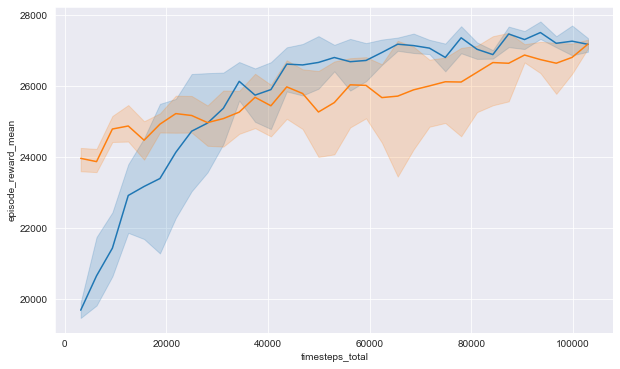

In [105]:
# plot the confidence interval for the mean
# dont't have customised measurements in the progress.csv file, maybe we need to get data from the *.json file.
sns.lineplot(x='timesteps_total',y='episode_reward_mean', data=df_results)  # 2 actions (blue)
sns.lineplot(x='timesteps_total',y='episode_reward_mean', data=df_results1)  # 5 actions (yellow)

In [96]:
# test if some file is missing
oo = {}
NoT = 40 # number of tasks in the whole time period
NoS = 60 # number of samples
for F in [8.0]:
    for k in [0.35, 0.4, 0.45]:
        for i in range(30,NoS):
            f = open('simulation_results_ILP\\s2(sw)'
                                                 +'_'+str(NoT)+'_'+str(k)+'_'+str(F)+'_'+str(i)+'.csv')
           
            f.close()

FileNotFoundError: [Errno 2] No such file or directory: 'simulation_results_ILP\\s2(sw)_40_0.35_8.0_30.csv'

In [81]:
# print the value of the file
NoT = 20 # number of tasks in the whole time period
NoS = 23 # number of samples
F = 8.0
k = 0.35


f = open('simulation_results_ILP\\fog(tm)'
                                                 +'_'+str(NoT)+'_'+str(k)+'_'+str(F)+'_'+str(i)+'.csv')
csv_f = csv.reader(f)
for row in csv_f:
    print(float(row[0]))
f.close()

FileNotFoundError: [Errno 2] No such file or directory: 'simulation_results_ILP\\fog(tm)_20_0.35_8.0_56.csv'

In [61]:
# get the data
oo = {}
NoT = 20 # number of tasks in the whole time period
NoS = 100 # number of samples
for F in [8.0]:
    for k in [0.35, 0.4, 0.45]:
        for i in range(NoS):
            f = open('simulation_results_ILP\\oo(sw)'
                                                 +'_'+str(NoT)+'_'+str(k)+'_'+str(F)+'_'+str(i)+'.csv')
            csv_f = csv.reader(f)
            for row in csv_f:
                oo['sw', NoT, k, F, i] = float(row[0])
            f.close()

# s2 = {}
# NoT = 20
# NoS = 100 # number of samples
# for F in [8.0]:
#     for k in [0.35, 0.4, 0.45]:
#         for i in range(1,NoS+1):
#             f = open('simulation_results_ILP\s2(sw)'
#                                                  +'_'+str(NoT)+'_'+str(k)+'_'+str(F)+'_'+str(i)+'.csv')
#             csv_f = csv.reader(f)
#             for row in csv_f:
#                 s2['sw', NoT, k, F, i] = float(row[0])
#             f.close()

og = {}
NoT = 20
NoS = 100 # number of samples
for F in [8.0]:
    for k in [0.35, 0.4, 0.45]:
        for i in range(NoS):
            f = open('simulation_results_ILP/og(sw)'
                                                 +'_'+str(NoT)+'_'+str(k)+'_'+str(F)+'_'+str(i)+'.csv')
            csv_f = csv.reader(f)
            for row in csv_f:
                og['sw', NoT, k, F, i] = float(row[0])
            f.close()
            
fog = {}
NoT = 20
NoS = 100 # number of samples
for F in [8.0]:
    for k in [0.35, 0.4, 0.45]:
        for i in range(NoS):
            f = open('simulation_results_ILP/fog(sw)' 
                                                 +'_'+str(NoT)+'_'+str(k)+'_'+str(F)+'_'+str(i)+'.csv')
            csv_f = csv.reader(f)
            for row in csv_f:
                fog['sw', NoT, k, F, i] = float(row[0])
            f.close()

FileNotFoundError: [Errno 2] No such file or directory: 'simulation_results_ILP\\oo(tn)_20_0.35_8.0_0.csv'

In [49]:
# whe F = 8 construct a dataframe
d = {}
F = 8.0
NoT = 20

for k in [0.35, 0.4, 0.45]:
    d[k] = [oo['sw', NoT, k, F, i] for i in range(10)]
result_oo = pd.DataFrame(data=d)
# print(result_oo)
# for k in [0.35, 0.4, 0.45]:
#     d[k] = [s2['sw', NoT, k, F, i] for i in range(10)]
# result_s2 = pd.DataFrame(data=d)

# online greedy：
for k in [0.35, 0.4, 0.45]:
    d[k] = [og['sw', NoT, k, F, i] for i in range(10)]
result_og = pd.DataFrame(data=d)

# online greedy：
for k in [0.35, 0.4, 0.45]:
    d[k] = [fog['sw', NoT, k, F, i] for i in range(10)]
result_fog = pd.DataFrame(data=d)

In [50]:
result_oo.head()
result_fog.head()

,0.35,0.4,0.45
0,76.885713,130.451414,147.986178
1,30.509043,111.756084,179.278694
2,95.362268,95.362268,109.339905
3,79.681996,115.216091,115.216091
4,58.345266,64.015251,147.388581


In [51]:
mean_oo = result_oo.mean(axis = 0)
# pd.DataFrame.std: Return sample standard deviation
std_oo = result_oo.std(axis = 0)  

mean_og = result_og.mean(axis = 0)
# pd.DataFrame.std: Return sample standard deviation
std_og = result_og.std(axis = 0)  

mean_fog = result_fog.mean(axis = 0)
# pd.DataFrame.std: Return sample standard deviation
std_fog = result_fog.std(axis = 0)  

In [8]:
stats.t.ppf(1-0.025, NoS -1)

2.2621571627409915

<function matplotlib.pyplot.show(*args, **kw)>

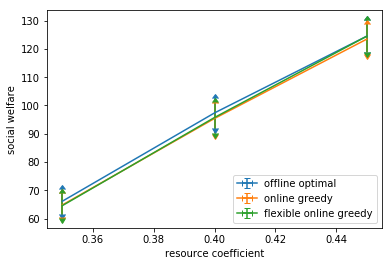

In [54]:
# Degrees of Freedom = n – 1, 
plt.errorbar(mean_oo.index, mean_oo, xerr = 0, 
             yerr = std_oo / np.sqrt(NoS) * stats.t.ppf(1-0.025, NoS -1), uplims =True, lolims = True)
plt.errorbar(mean_og.index, mean_og, xerr = 0, 
             yerr = std_og / np.sqrt(NoS) * stats.t.ppf(1-0.025, NoS -1), uplims =True, lolims = True)
plt.errorbar(mean_fog.index, mean_fog, xerr = 0, 
             yerr = std_fog / np.sqrt(NoS) * stats.t.ppf(1-0.025, NoS -1), uplims =True, lolims = True)

# plt.errorbar(mean_sp.index, mean_sp, xerr = 0, yerr = std_sp * 2.024, uplims =True, lolims = True)
# plt.errorbar(mean_ogwf.index, mean_ogwf, xerr = 0, yerr = std_ogwf * 2.201, uplims =True, lolims = True)

# plt.legend(['offline optimal','online greedy','SWMOA', 'flexible online greedy'], loc = 'lower right')
plt.legend(['offline optimal','online greedy','flexible online greedy'],
           loc = 'lower right')
plt.xlabel("resource coefficient")
plt.ylabel("social welfare")

# setting y axis limit
axes = plt.gca()
# axes.set_ylim([0,150])

plt.show
# plt.savefig('comparison of four algorithms.png')

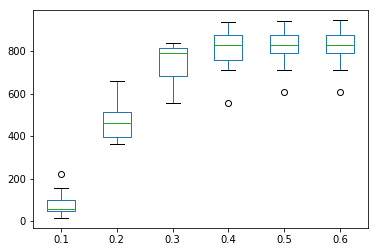

In [9]:
figure = result_oo.boxplot(column = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6], grid = False)
figure

In [10]:
result_ogf = pd.read_csv("ogf.csv", names =[0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
result_ogf

,0.1,0.2,0.3,0.4,0.5,0.6
0,14.804852,332.890855,652.369911,746.533202,777.027914,792.476771
1,56.521479,370.154354,493.321468,528.951987,589.274848,594.596347
2,47.411757,407.639529,711.373646,816.137509,862.060722,866.744365
3,100.571917,326.468696,619.003658,740.686540,806.678539,812.698734
4,23.902616,321.094077,522.944716,612.995375,687.752965,710.076344
5,154.762243,480.981699,769.852791,851.784412,873.735865,876.118105
6,72.933631,444.426765,699.576083,780.564186,871.350049,888.037135
7,220.364277,574.035761,755.896787,875.784334,916.232126,930.780785
8,52.719876,383.106946,574.283435,696.686036,767.569875,776.806368
9,50.178481,349.119487,632.016703,732.477321,798.342159,821.735499


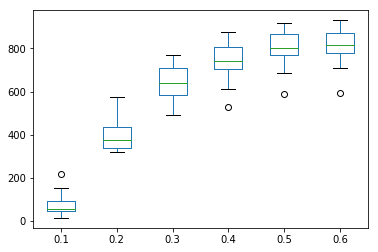

In [12]:
figure = result_ogf.boxplot(column = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6], grid = False)
figure